**Importing Libraries**

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import keras
from sklearn.metrics import confusion_matrix, classification_report

**Load Dataset**

In [78]:
dataset = tf.keras.datasets.fashion_mnist.load_data()

(x_train, y_train), (x_test, y_test) = dataset


**make one Hot encoding to labels**

In [79]:
y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [80]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


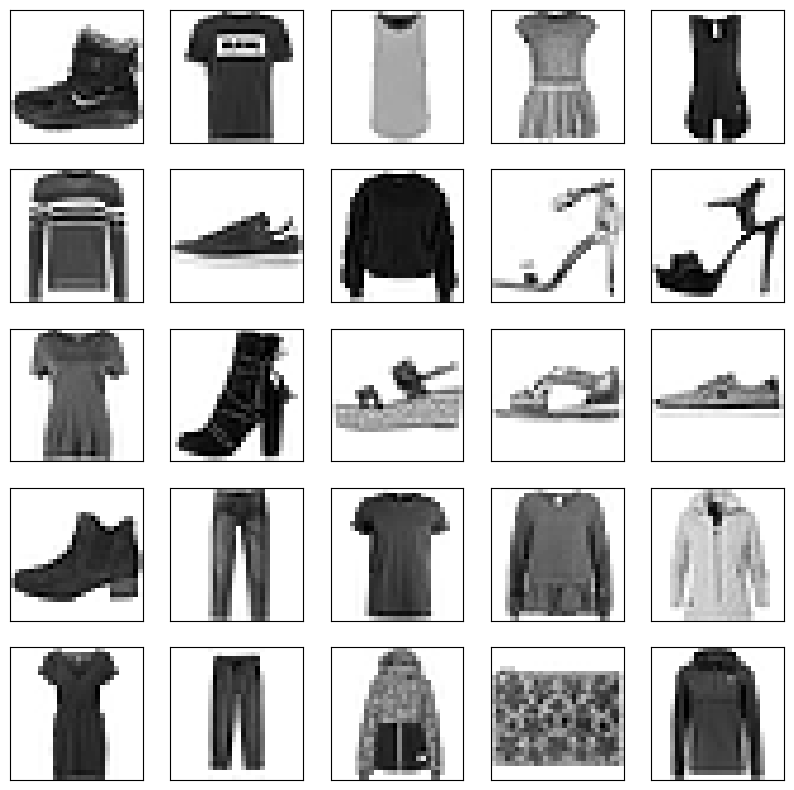

In [96]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
plt.show()

In [82]:
print(y_train[1])

0


**Rescale**

In [94]:
x_train = x_train/255
x_test = x_test/255

**Callbacks**

In [84]:
early_stopping = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
checkpoints = keras.callbacks.ModelCheckpoint("fashion_mnist.keras",save_best_only=True)

**Make CNN Model for Classification**

In [85]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [86]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

In [87]:
model.compile(loss = "categorical_crossentropy",
              optimizer = "Adam",
              metrics=["accuracy"]
              )

**fit the model to data(x_train & y_train)**

In [88]:
hist = model.fit(x_train,y_train_one_hot,epochs=100,batch_size=100,
                 validation_split=0.1,callbacks=[early_stopping, checkpoints])

Epoch 1/100
540/540 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7825 - loss: 0.6149 - val_accuracy: 0.8765 - val_loss: 0.3383
Epoch 2/100
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8853 - loss: 0.3203 - val_accuracy: 0.8985 - val_loss: 0.2906
Epoch 3/100
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9011 - loss: 0.2703 - val_accuracy: 0.9052 - val_loss: 0.2665
Epoch 4/100
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9113 - loss: 0.2461 - val_accuracy: 0.9037 - val_loss: 0.2654
Epoch 5/100
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9201 - loss: 0.2200 - val_accuracy: 0.9148 - val_loss: 0.2421
Epoch 6/100
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9272 - loss: 0.1999 - val_accuracy: 0.9018 - val_loss: 0.2628
Epoch 7/100
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9338 - loss: 0.1803 - val_accuracy: 0.9090 - val_loss: 0.2522
Epoch 8/100
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9385 - loss: 0.1657 - val_accu

**Evaluate the model**

In [89]:
model.evaluate(x_test,y_test_one_hot)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9127 - loss: 0.2536


[0.24597401916980743, 0.9142000079154968]

In [90]:
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [91]:
y_predictes = y_pred.argmax(axis=1)

**Classification Report**

In [92]:
print(classification_report(y_test,y_predictes))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1000
           1       0.99      0.98      0.99      1000
           2       0.88      0.85      0.86      1000
           3       0.92      0.91      0.92      1000
           4       0.81      0.92      0.86      1000
           5       0.97      0.99      0.98      1000
           6       0.81      0.69      0.75      1000
           7       0.96      0.96      0.96      1000
           8       0.96      0.98      0.97      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



**Confusion Matrix for 10 labels**

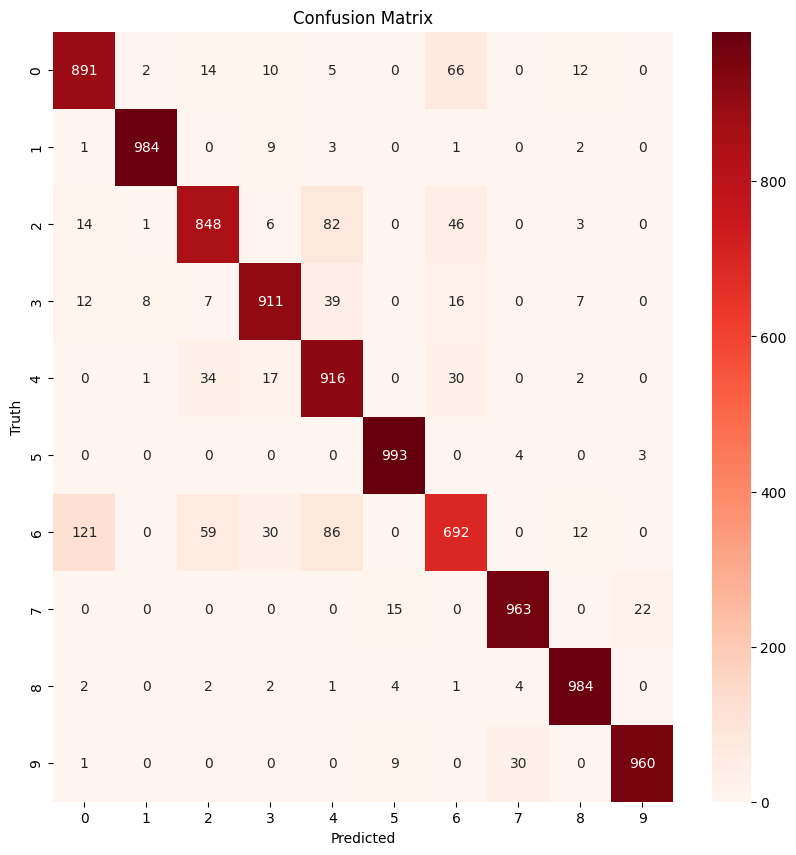

In [93]:
cm = confusion_matrix(y_test,y_predictes)
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,fmt="d",cmap="Reds")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()